# Creating a Model for benchmark test
- only 3 classes pizza steak
- 100 images (75 train and 25 test)

In [1]:
import sys
import os
import torch

sys.path.append(os.path.abspath(".."))  # Go up from notebooks/ to project root

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Importing TinyVGG

In [2]:
from models.modelclass.models import TinyVGG

model_0 = TinyVGG(
    input_layer=3,
    hidden_layer=10,
    output_layer=3)

model_0.to(device)


TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.25, inplace=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7):

# Creating the dataset


In [3]:
from pathlib import Path

data_dir = Path("./pizza_steak_sushi")
train_dir = data_dir/"train"
test_dir = data_dir/"test"

print(train_dir)
print(test_dir)

pizza_steak_sushi\train
pizza_steak_sushi\test


* creating the transform

In [13]:
from torchvision import transforms

mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    # transforms.TrivialAugmentWide(),  # Still lightweight
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


test_transform = transforms.Compose([
    transforms.Resize(size = (224 , 224)),
    transforms.ToTensor(),
    transforms.Normalize(                     # Normalize to ImageNet mean/std
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

print(f"Train transform: {train_transform}")
print(f"Test transform: {test_transform}")

Train transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
Test transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [14]:
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(
    root = train_dir,
    transform = train_transform   
)

test_dataset = ImageFolder(
    root = test_dir,
    transform = test_transform
)

print(train_dataset)
print(test_dataset)
classes = train_dataset.classes
print(classes)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 75
    Root location: pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
['pizza', 'steak', 'sushi']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..1.5245317].


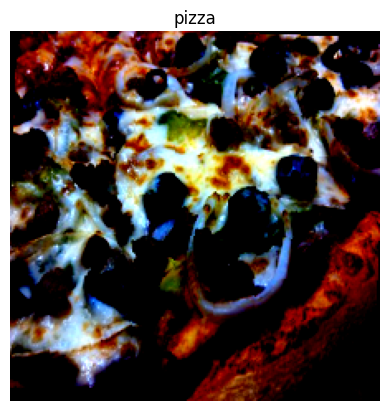

In [15]:
from helper.Visualize import plot_image

image, label = train_dataset[10]

plot_image(image, classes[label])

creating the DataLoader

In [16]:
from torch.utils.data import DataLoader

EPOCHS = 3
BATCH_SIZE = 32


train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 0,
    shuffle = True,
    pin_memory = True
)

test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 0,
    shuffle = False,
    pin_memory = True
)

In [17]:
print(train_dataloader)
print(test_dataloader)

image, label = next(iter(train_dataloader))
print(image.shape)

torch.Size([32, 3, 224, 224])


# Training the model

In [18]:
from torchinfo import summary

summary(model = model_0 , input_size=(32, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 112, 112]        --
│    └─Conv2d: 2-1                       [32, 10, 224, 224]        280
│    └─BatchNorm2d: 2-2                  [32, 10, 224, 224]        20
│    └─ReLU: 2-3                         [32, 10, 224, 224]        --
│    └─Conv2d: 2-4                       [32, 10, 224, 224]        910
│    └─BatchNorm2d: 2-5                  [32, 10, 224, 224]        20
│    └─ReLU: 2-6                         [32, 10, 224, 224]        --
│    └─MaxPool2d: 2-7                    [32, 10, 112, 112]        --
│    └─Dropout2d: 2-8                    [32, 10, 112, 112]        --
├─Sequential: 1-2                        [32, 10, 56, 56]          --
│    └─Conv2d: 2-9                       [32, 10, 112, 112]        910
│    └─BatchNorm2d: 2-10                 [32, 10, 112, 112]        20
│    └─ReLU:

In [19]:
from torch.optim import Adam
from torch import nn

optimizer = Adam(model_0.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5) # type: ignore


In [20]:
from helper.Process import run_train_test

results = run_train_test(
    model = model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    scheduler=scheduler,
    device= torch.device(device),
    epochs=30
)


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch:0	Train Loss:1.7176	Train Acc:0.5234	Test Loss:1.3722	Test Acc:0.3532
Epoch:1	Train Loss:0.8687	Train Acc:0.5938	Test Loss:1.1372	Test Acc:0.5625
Epoch:2	Train Loss:1.2783	Train Acc:0.5820	Test Loss:2.1701	Test Acc:0.3741
Epoch:3	Train Loss:1.2592	Train Acc:0.4453	Test Loss:1.0549	Test Acc:0.4943
Epoch:4	Train Loss:0.8878	Train Acc:0.6445	Test Loss:1.3971	Test Acc:0.4536
Epoch:5	Train Loss:1.0058	Train Acc:0.6328	Test Loss:1.4218	Test Acc:0.4545
Epoch:6	Train Loss:1.4802	Train Acc:0.5078	Test Loss:1.5135	Test Acc:0.4119
Epoch:7	Train Loss:1.1545	Train Acc:0.4727	Test Loss:1.1887	Test Acc:0.5426
Epoch:8	Train Loss:2.0269	Train Acc:0.4414	Test Loss:1.7387	Test Acc:0.4659
Epoch:9	Train Loss:1.0394	Train Acc:0.4727	Test Loss:1.0277	Test Acc:0.6269
Epoch:10	Train Loss:1.1329	Train Acc:0.5469	Test Loss:1.6985	Test Acc:0.4830
Epoch:11	Train Loss:2.0841	Train Acc:0.4531	Test Loss:2.0290	Test Acc:0.3826
Epoch:12	Train Loss:1.8846	Train Acc:0.5664	Test Loss:2.6487	Test Acc:0.4062
Epoch:13	

{'train_loss': [1.7175750155001879, 0.8687294498085976, 1.2783092195168138, 1.2592328861355782, 0.8878168202936649, 1.005778931081295, 1.4802079424262047, 1.1545076370239258, 2.026887744665146, 1.039410039782524, 1.132925845682621, 2.0840846076607704, 1.8846181090921164, 1.1553124015335925, 0.8812594041228294, 1.5161759778857231, 1.016197924502194, 1.0789183601737022, 1.2488733530044556, 1.215166099369526, 1.042241012037266, 0.8669683542102575, 0.9348011538386345, 1.2628631964325905, 1.2294657677412033, 0.7066240085987374, 0.9998959898948669, 0.9533270299434662, 0.9578572139143944, 1.6127312183380127], 'train_acc': [0.5234375, 0.59375, 0.58203125, 0.4453125, 0.64453125, 0.6328125, 0.5078125, 0.47265625, 0.44140625, 0.47265625, 0.546875, 0.453125, 0.56640625, 0.625, 0.67578125, 0.53515625, 0.61328125, 0.46484375, 0.55078125, 0.56640625, 0.5859375, 0.609375, 0.52734375, 0.51953125, 0.50390625, 0.68359375, 0.5390625, 0.6484375, 0.546875, 0.55078125], 'test_loss': [1.3722387949625652, 1.13

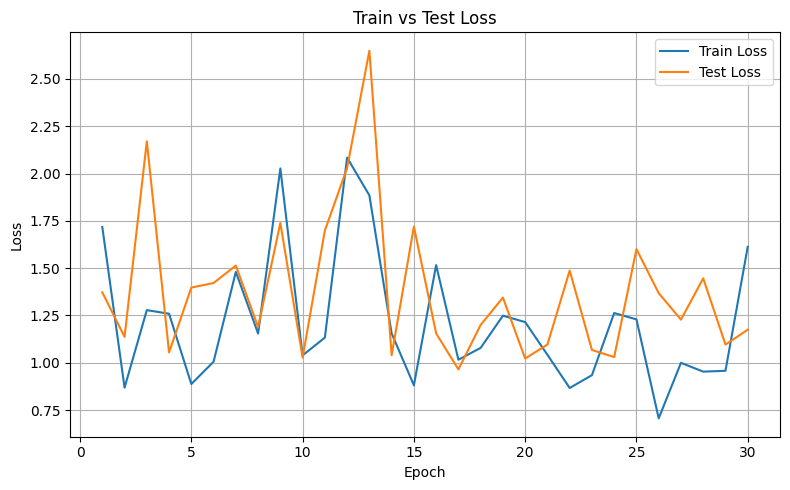

In [21]:
from helper.Visualize import plot_train_vs_test_loss

print(results)
plot_train_vs_test_loss(results)